[Reference](https://towardsdatascience.com/support-vector-machine-svm-for-anomaly-detection-73a8d676c331)

In [1]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [2]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

# input data
df = data[["sepal_length", "sepal_width"]]

In [3]:
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [4]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df)

In [5]:
# prediction
y_pred = model.predict(df)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
# filter outlier index
outlier_index = where(y_pred == -1) 

# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
13,4.3,3.0
41,4.5,2.3
117,7.7,3.8
118,7.7,2.6
131,7.9,3.8


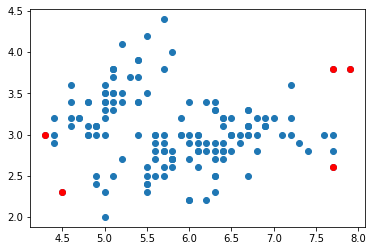

In [7]:
# visualize outputs
plt.scatter(data["sepal_length"], df["sepal_width"])
plt.scatter(outlier_values["sepal_length"], outlier_values["sepal_width"], c = "r")